In [1]:
#%pip install prophet

In [2]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error as mae
from prophet import Prophet
import matplotlib.pyplot as plt 

In [3]:
btc_df = pd.read_csv(r"C:\Users\David gathara marigi\Downloads\bitcoin_price.csv")

In [4]:
btc_df['time'] = pd.to_datetime(btc_df['time'], unit='ms') 
btc_df.set_index('time', inplace=True) 
btc_df = btc_df[['close', 'volume']]

In [5]:
btc_df['close_1d_future'] = btc_df['close'].shift(-1) 
btc_df.dropna(inplace=True)

In [6]:
features = btc_df.drop('close_1d_future', axis=1) 
targets = btc_df['close_1d_future'] 
train_idx = int(0.75 * btc_df.shape[0]) 
x_train = features.iloc[:train_idx] 
y_train = targets.iloc[:train_idx] 
x_test = features.iloc[train_idx:] 
y_test = targets.iloc[train_idx:]

In [7]:
l1_lr = LassoCV(cv=TimeSeriesSplit()) 
l1_lr.fit(x_train, y_train) 
print(mae(y_train, l1_lr.predict(x_train))) 
print(mae(y_test, l1_lr.predict(x_test)))

85.63489721292613
220.80838114586564


C:\Users\David gathara marigi\AppData\Local\Temp\ipykernel_9084\2988321574.py:5: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(train_dates, y_train, fmt='-', color='b')
C:\Users\David gathara marigi\AppData\Local\Temp\ipykernel_9084\2988321574.py:6: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(train_dates, train_predictions, fmt='--',
C:\Users\David gathara marigi\AppData\Local\Temp\ipykernel_9084\2988321574.py:8: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(test_dates, y_test, fmt='-', color='k')
C:\Users\David gathara marigi\AppData\Local\Temp\ipykernel_9084\2988321574.py:9: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed

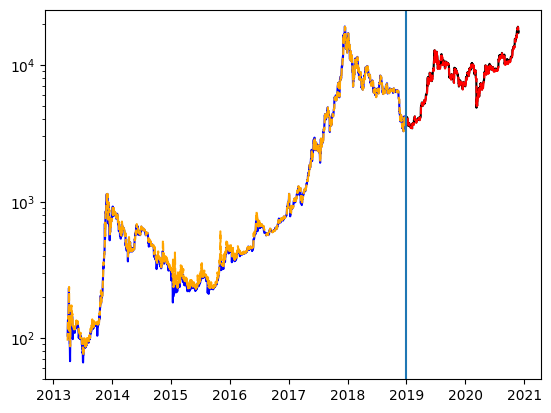

In [8]:
train_dates = btc_df.index[:train_idx] 
test_dates = btc_df.index[train_idx:] 
train_predictions = l1_lr.predict(x_train) 
test_predictions = l1_lr.predict(x_test) 
plt.plot_date(train_dates, y_train, fmt='-', color='b') 
plt.plot_date(train_dates, train_predictions, fmt='--', 
color='orange') 
plt.plot_date(test_dates, y_test, fmt='-', color='k') 
plt.plot_date(test_dates, test_predictions, fmt='--', 
color='r') 
plt.axvline(btc_df.index[train_idx]) 
plt.yscale('log')

In [9]:
btc_df.reset_index(inplace=True) 
btc_df.drop('close_1d_future', axis=1, inplace=True) 
btc_df.rename(columns={'close': 'y', 'time': 'ds'}, 
inplace=True)

In [10]:
m = Prophet() 
m.fit(btc_df)

15:30:44 - cmdstanpy - INFO - Chain [1] start processing
15:30:48 - cmdstanpy - INFO - Chain [1] done processing


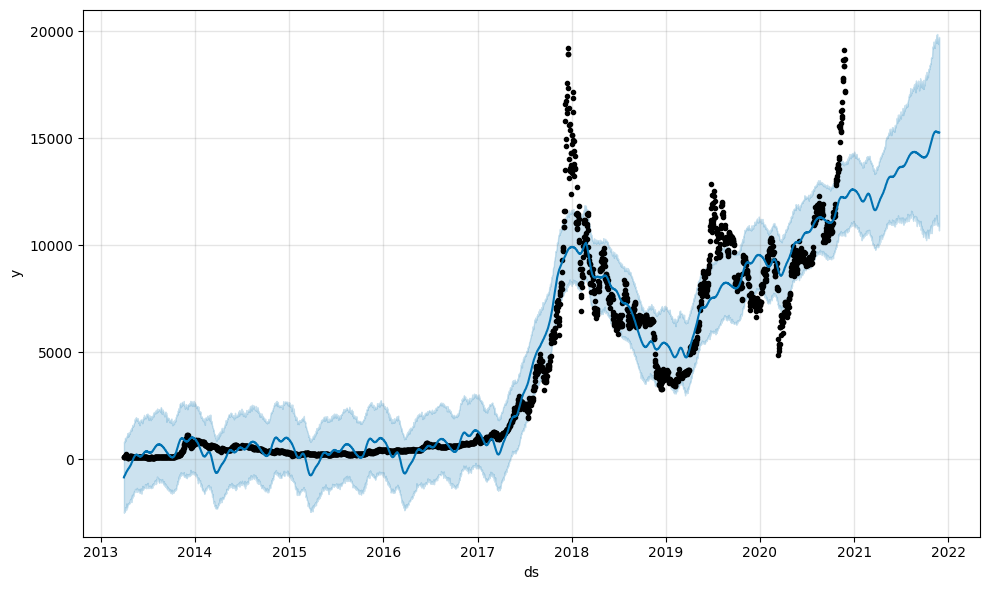

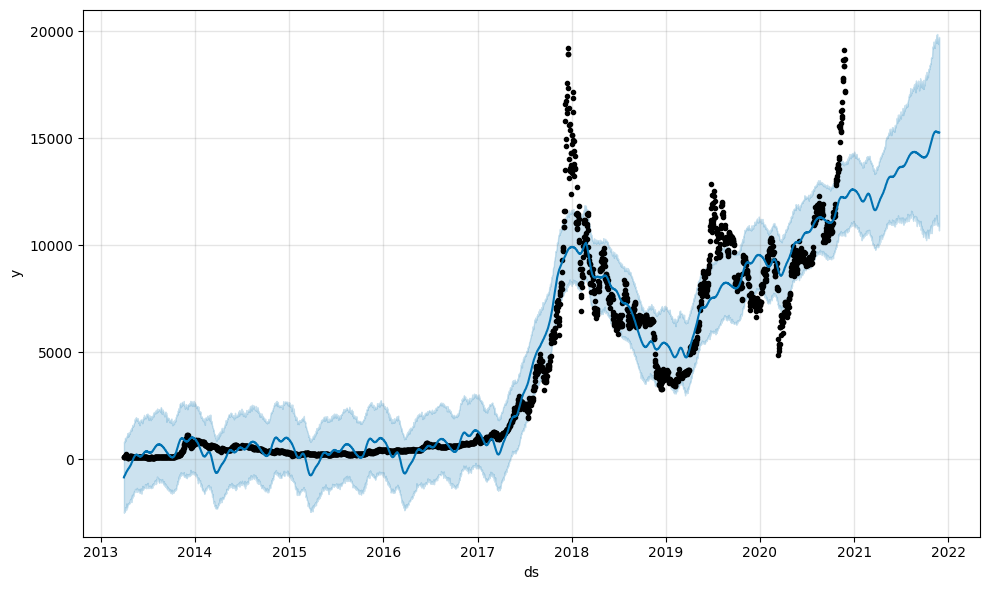

In [11]:
future = m.make_future_dataframe(periods=365) 
forecast = m.predict(future) 
m.plot(forecast)

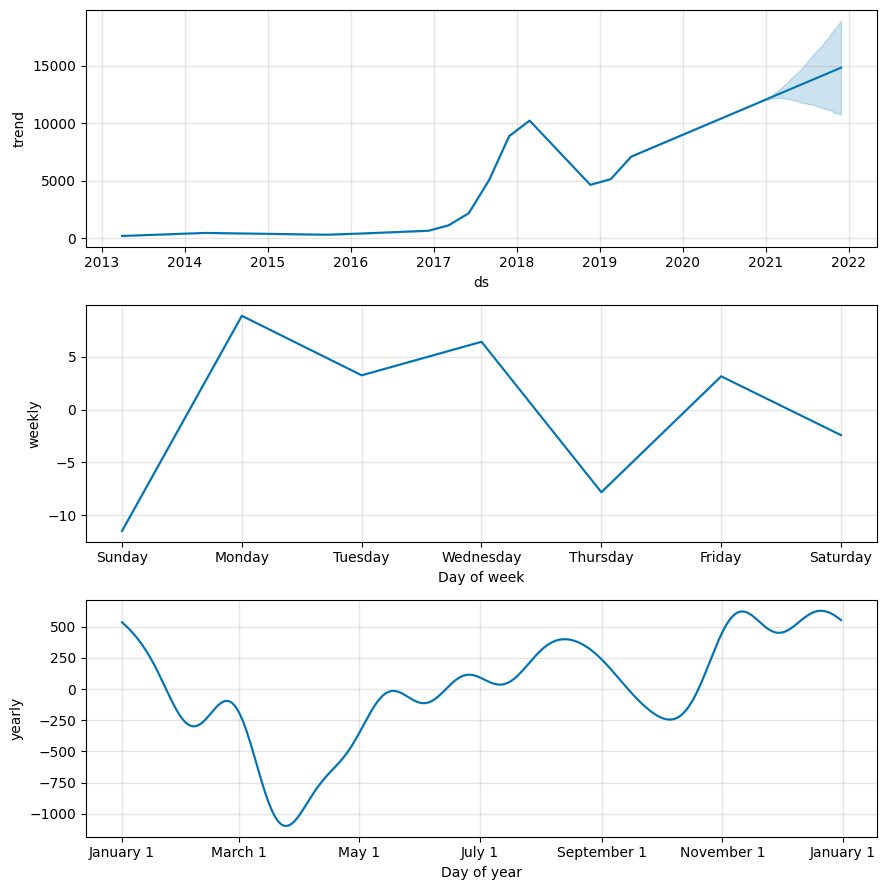

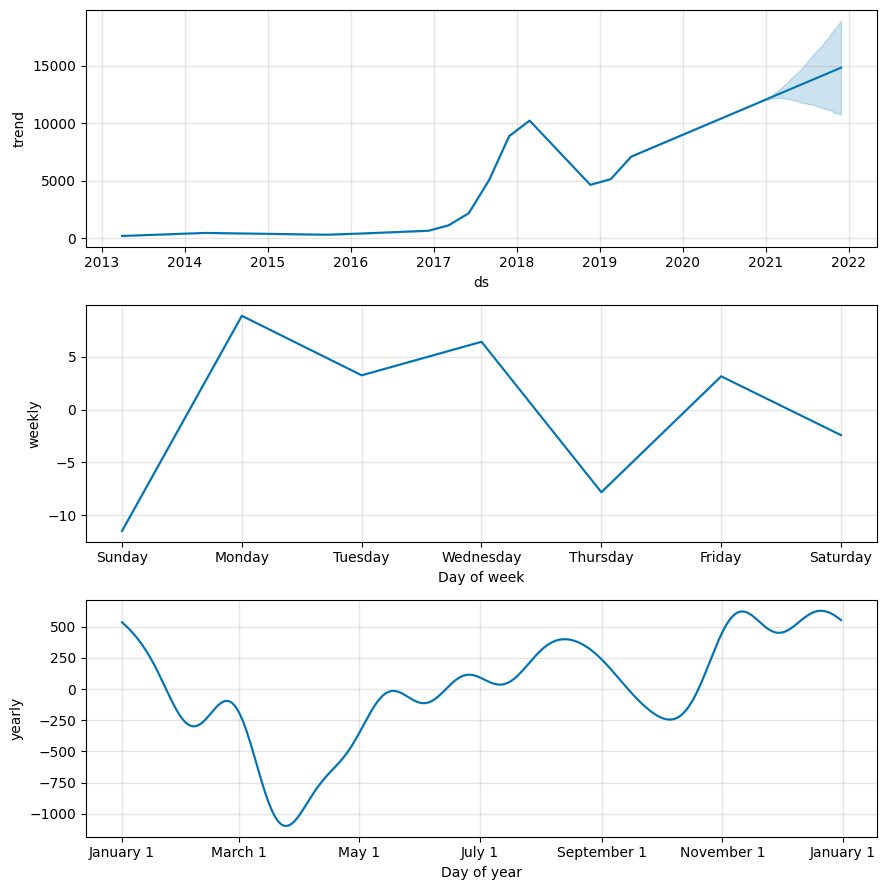

In [12]:
m.plot_components(forecast)